# Beta Bank Customers

This project will predict whether a customer will leave the bank soon. It will use data on clients’ past behavior and termination of contracts with the bank to create a predictive model.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#General-Information" data-toc-modified-id="General-Information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>General Information</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Imbalanced-Model-Testing" data-toc-modified-id="Imbalanced-Model-Testing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imbalanced Model Testing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Balanced-Testing" data-toc-modified-id="Balanced-Testing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Balanced Testing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Final-Model-Testing" data-toc-modified-id="Final-Model-Testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Final Model Testing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Final-Conclusion" data-toc-modified-id="Final-Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final Conclusion</a></span></li></ul></div>

## General Information

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import numpy as np
import warnings

data=pd.read_csv('/datasets/Churn.csv')
print(data.isnull().sum())

data_a=data
print(data_a.columns[data.dtypes=='object'])
data_a['Gender'] = pd.get_dummies(data_a['Gender'], drop_first=True)
data_a['Geography'] = pd.get_dummies(data_a['Geography'], drop_first=True)



tenure_avg = data_a.groupby(['HasCrCard','CreditScore','IsActiveMember','NumOfProducts','Gender'])['Tenure'].transform('median')
data_a['Tenure'] = data_a['Tenure'].fillna(tenure_avg)
data_n = data_a.dropna()
print(data_n.isnull().sum())
display(data)

target= data_n['Exited']
features=data_n.drop(['Exited'],axis=1)

features_t, features_test, target_t, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

features_t, features_v, target_t, target_v = train_test_split(features_t, target_t, test_size=0.25, random_state=12345)





num=data_n.columns[data_n.dtypes!='object'].drop(['Exited'])

scaler = StandardScaler()
scaler.fit(features_t[num])
features_train_s = scaler.transform(features_t[num])
features_valid_s = scaler.transform(features_v[num]) 
features_s = scaler.transform(features_test[num])

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64
Index(['Surname', 'Geography', 'Gender'], dtype='object')
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,0,0,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,0,0,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3.0,75075.31,2,1,0,92888.52,1


0    7784
1    1968
Name: Exited, dtype: int64


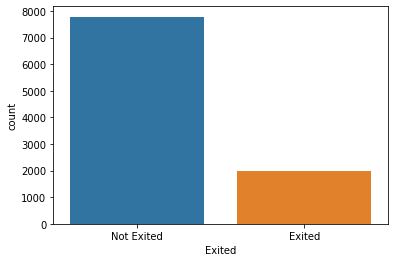

In [2]:
import seaborn as sns
print(data_n['Exited'].value_counts())
g = sns.countplot(data_n['Exited'])
g.set_xticklabels(['Not Exited','Exited'])
plt.show()

### Conclusion

First to see if there are any missing values in the dataset that would inhibit the ability for the model to work and used isnull() method to do this. Found that there are missing values in the tenure column. Dropping all those values completely may affect the usability of the final model, so used the groupby function to create a median value, of which customers who are grouped by those columns have an average tenure. Median is used of mean as mean is sensitive to extreme values. 

One hot encoding is then used to numerate the categorical columns gender and geography and make them more explicit to the 
machine as they are important columns regarding the model producing accurate predictions. In both columns drop_first=True as the gender column has perfect collinearity and the geography has multicollinearity.

Train test split is used to seperate the features and target into test and validation datasets. Standard scaler is used to
normalise the data in the features columns, by arranging the data in a standard normal distribution.

The diagram below shows that there is a class imbalance in the data. There are clearly more negative (0) values than positive (1) values for the desired columnn of exiting the bank, this is affirmed by the count of 0 values to 1 values where there is more than double 0 values. This imbalance is likely to cause an issue in the predictive model as will be discovered below.

## Imbalanced Model Testing

       estimators  Model score        f1
depth                                   
10             50     0.865500  0.549451
10             40     0.863860  0.548094
10             30     0.864407  0.545788
9              10     0.858939  0.540925
9              90     0.862220  0.540146 
 [[1430   43]
 [ 209  147]]


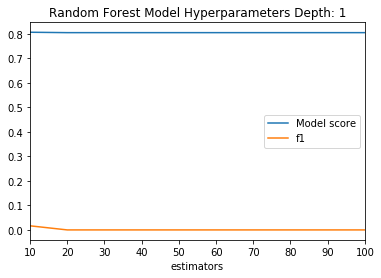

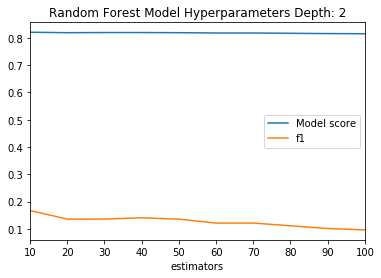

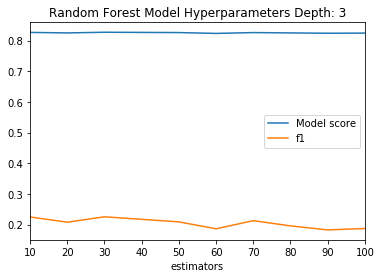

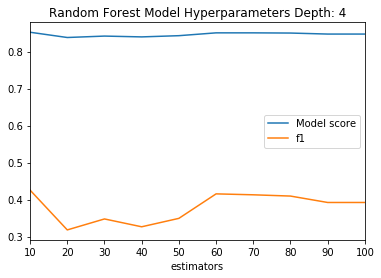

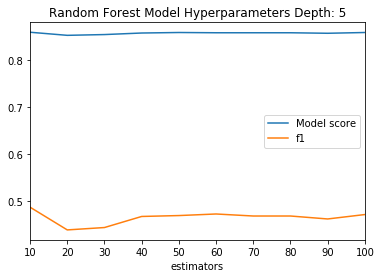

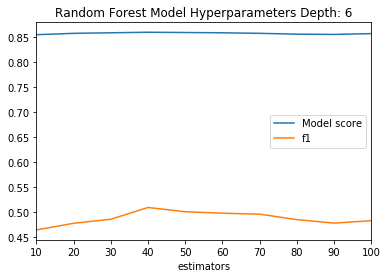

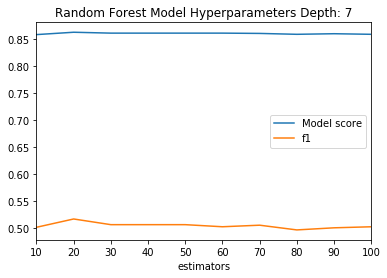

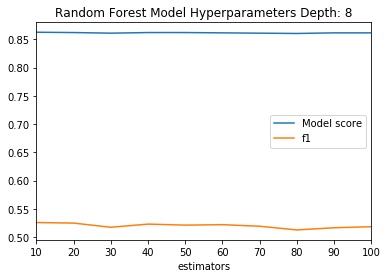

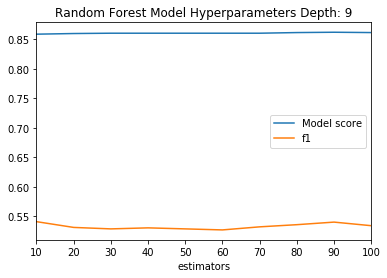

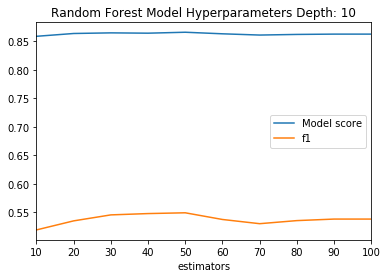

In [3]:
def random_f(feature_1,target_tr,feature,target,h):
    warnings.filterwarnings('ignore')
    diag_list = []
    for estimators, depth in itertools.product(range(10,101,10), range(1,11,1)):
        models= RandomForestClassifier(random_state=12345,n_estimators=estimators,max_depth=depth, class_weight= h)
        models.fit(feature_1,target_tr)
        predictions = models.predict(feature)
        confusion = confusion_matrix(target, predictions)
        f1 = f1_score(target,predictions)
        score= models.score(feature,target)
        diag_list.append([estimators, depth, score,f1])
        df_diag = pd.DataFrame(diag_list, columns=['estimators', 'depth', 'Model score','f1'])
    df_diag.set_index('depth', inplace=True)
    print(df_diag.sort_values(by='f1',ascending=False).head(5),'\n', confusion)

    def plot(number):
        h = df_diag[df_diag.index == number]
        h.plot(x='estimators', y=['Model score','f1'])
        plt.title(f'Random Forest Model Hyperparameters Depth: {number}')
        plt.show()
    for i in range(1,11,1):
        plot(i)
random_f(features_train_s,target_t,features_valid_s,target_v, None)


#### Conclusion
The confusion matrix in random forest regression shows there are alot of true negatives in the dataset. There are more false negatives than false positives and even less true positives. This imbalance in the classes has resulted in a low F1 of 0.54, which is the highest value in the random forest regressor. This F1 score does not meet the threshold of 0.59. The following graphs measuring model score and f1 show in imbalanced classes the accuracy score is not that useful as despite the low f1 scores, the model score reaching a high accuracy of 0.86. The large amount of true negative scores have been overcompensated.

   depth  Model score        f1
6      7     0.854565  0.541379
8      9     0.839256  0.524272
9     10     0.831055  0.517941
7      8     0.839256  0.510000
4      5     0.858939  0.509506 
 [[1354  119]
 [ 190  166]]


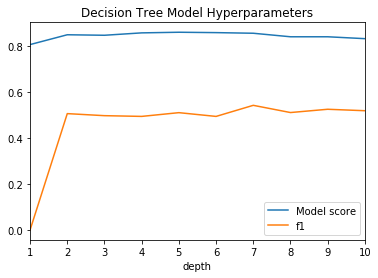

In [4]:
def decision_tree(feature_1,target_tr,feature,target,w):
    warnings.filterwarnings('ignore')
    ddf_list = []  
    for est in range(1,11,1):
            models= DecisionTreeClassifier(random_state=12345,max_depth=est, class_weight=w)
            models.fit(feature_1,target_tr)
            prediction = models.predict(feature)
            score= models.score(feature,target)
            f1 = f1_score(target,prediction)
            confusion = confusion_matrix(target, prediction)
            ddf_list.append([est,score,f1])
            ddf = pd.DataFrame(ddf_list, columns=['depth','Model score','f1'])
            
    print(ddf.sort_values(by='f1',ascending=False).head(5),'\n',confusion)

    ddf.plot(x='depth', y=['Model score','f1']);
    plt.title('Decision Tree Model Hyperparameters')
    plt.show()
    
decision_tree(features_train_s,target_t,features_valid_s,target_v, None)
   



#### Conclusion

The decision tree confusion matrix shows there is high amount of true negatives but less than random forest. There is a larger amount of true positives but there is also an even split of false positives and false negatives. However in random forest there was less false positives  but more false negatives. Despite this the F1 score is similar random forest but the model score is lower.

ROC value :  0.7592603186953172
Model score: 0.8234007654455987
F1 value:  0.33402061855670107
Confusion Matrix:
 [[1425   48]
 [ 275   81]]


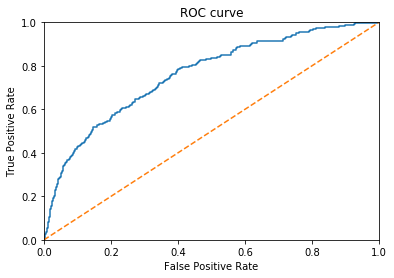

In [5]:

def Log_reg(feature_1,target_tr,feature,target,c):   
    modell = LogisticRegression(random_state=12345, solver='liblinear',class_weight= c)
    modell.fit(feature_1,target_tr)

    predict_prob = modell.predict_proba(feature)
    predictions = modell.predict(feature)
    f1 = f1_score(target,predictions)
    score= modell.score(feature,target)
    confusion = confusion_matrix(target, predictions)
    

    prob_one_valid = predict_prob[:, 1]
    auc_roc = roc_auc_score(target,prob_one_valid)
    print('ROC value : ',auc_roc)
    print('Model score:',score)
    print('F1 value: ',f1)
    print('Confusion Matrix:\n',confusion)
    fpr, tpr, thresholds = roc_curve(target,prob_one_valid)
    plt.figure()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()
Log_reg(features_train_s,target_t,features_valid_s,target_v,None) 



#### Conclusion

In a logisitc regression there is a similar amount of true negatives to random forest but there is also alot more
false negatives. The number of false positives is very low and true positives even lower. Clear imbalance towards the 
negative classes. As such the F1 score  and the model score is the lowest of all models.

However there is a good AUC roc score and good roc curve away from 45 degree line. This could be because ROC curves unaffected by skew as shown by the poor F1 score, compared to the high AUC roc score. Also F1 scores are to a particular threshold value in a classifier  thus corresponds to a particular value of precision and recall, while the ROC curve corresponds to different thresholds.


### Conclusion
To conclude the imbalance testing, there is a class imbalance with more negatives than positives. There is more bias toward picking majority value, which is 0 (negative) even if not the case. F1 score is below threshold so it performs fairly poor for the minority classes. Espically in logistic regression but this does not really affect the AUC roc scores or curve. To solve the issues caused by the imbalance, need to balance the classes.

## Balanced Testing

       estimators  Model score        f1
depth                                   
4              10     0.824494  0.607099
7              20     0.833789  0.606218
6              40     0.822307  0.601227
7              30     0.830508  0.600515
10             20     0.846364  0.599144 
 [[1338  135]
 [ 150  206]]


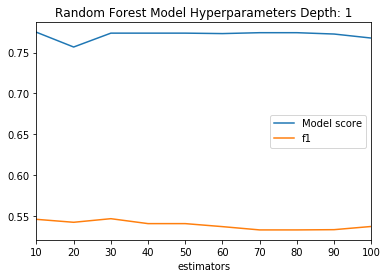

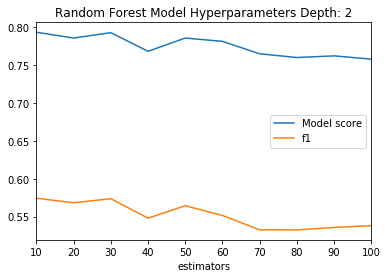

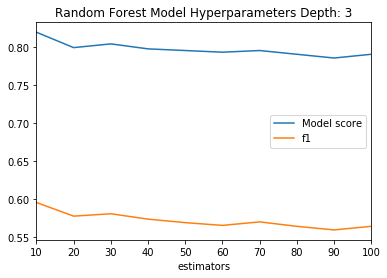

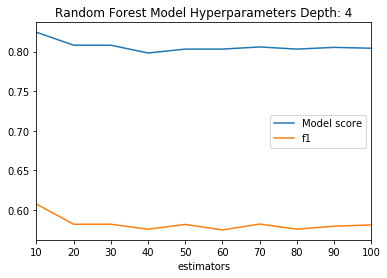

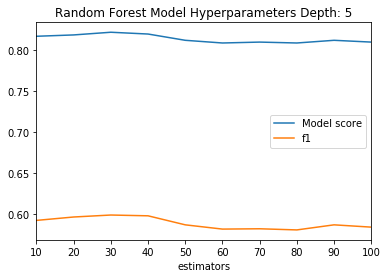

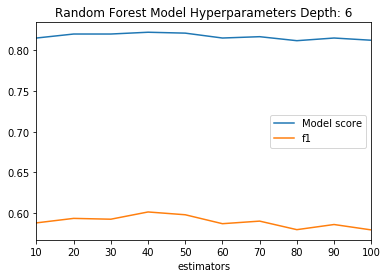

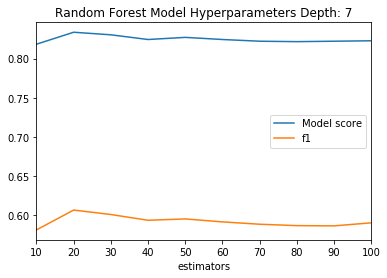

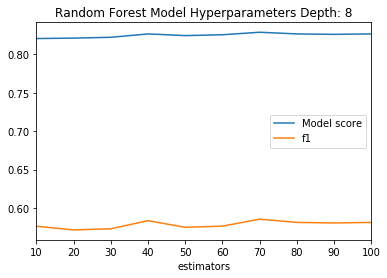

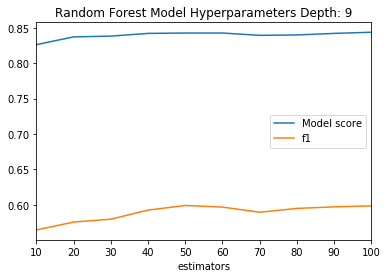

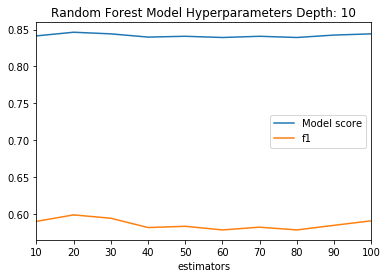

   depth  Model score        f1
4      5     0.828321  0.577957
6      7     0.771460  0.565489
5      6     0.780208  0.560175
7      8     0.782941  0.552424
9     10     0.785128  0.543554 
 [[1202  271]
 [ 122  234]]


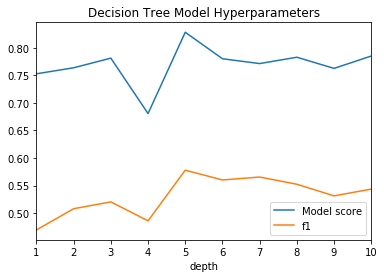

ROC value :  0.7632287542811812
Model score: 0.711864406779661
F1 value:  0.47035175879396984
Confusion Matrix:
 [[1068  405]
 [ 122  234]]


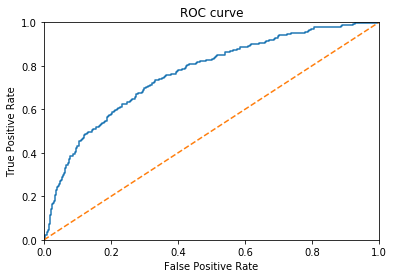

In [6]:

random_f(features_train_s,target_t,features_valid_s,target_v, 'balanced')
decision_tree(features_train_s,target_t,features_valid_s,target_v, 'balanced')
Log_reg(features_train_s,target_t,features_valid_s,target_v,'balanced')


       estimators  Model score        f1
depth                                   
7              70     0.820667  0.607656
10             40     0.820120  0.606930
7              60     0.818480  0.605701
8              30     0.811919  0.604598
8              40     0.810279  0.603429 
 [[1242  231]
 [ 104  252]]


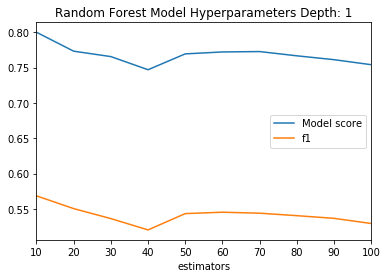

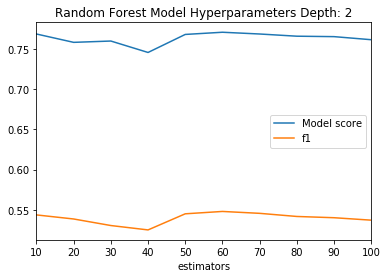

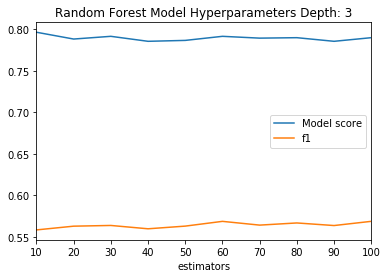

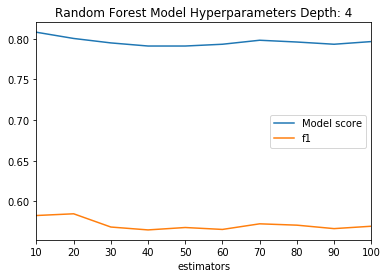

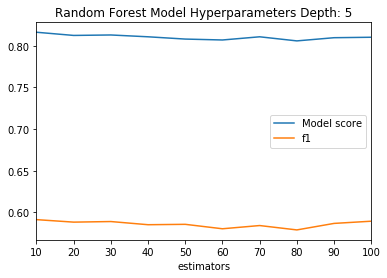

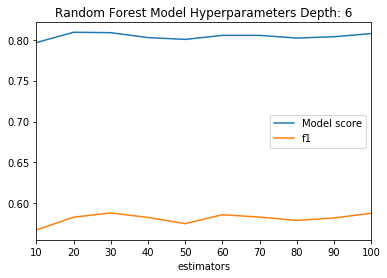

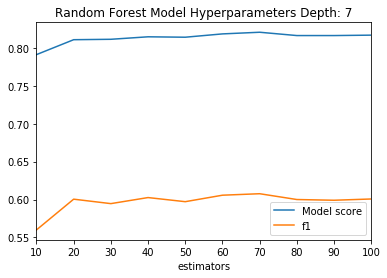

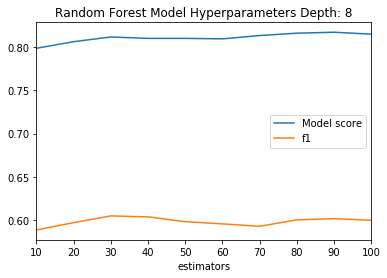

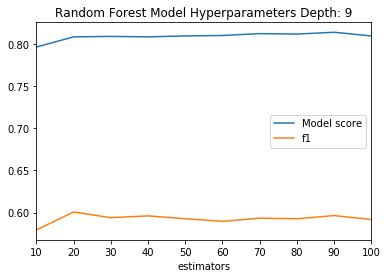

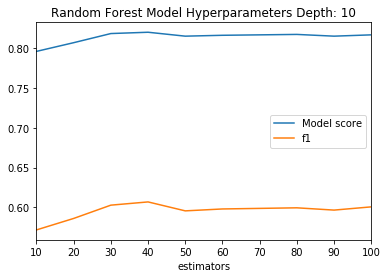

   depth  Model score        f1
5      6     0.799344  0.559424
4      5     0.770913  0.545060
6      7     0.769273  0.543290
8      9     0.752870  0.527197
2      3     0.773647  0.514085 
 [[1132  341]
 [ 120  236]]


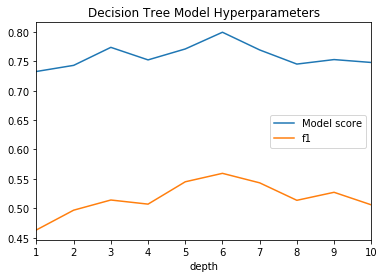

ROC value :  0.7619930280631898
Model score: 0.7151448879168945
F1 value:  0.4805583250249253
Confusion Matrix:
 [[1067  406]
 [ 115  241]]


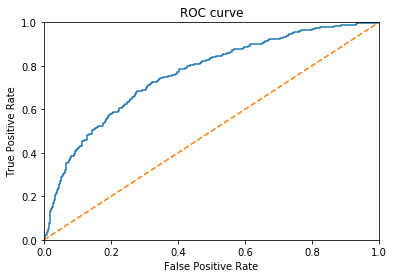

In [7]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction,random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction,random_state=12345)]+ [target_ones])
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_t, target_t, 0.3)
features_d= scaler.transform(features_downsampled[num])

random_f(features_d, target_downsampled,features_valid_s,target_v, 'balanced')
decision_tree(features_d, target_downsampled,features_valid_s,target_v, 'balanced')
Log_reg(features_d, target_downsampled,features_valid_s,target_v,'balanced')

### Conclusion

Adding a 'balanced' class weight to the models mirrors upsampling by internally giving a higher weighting to smaller classes.
While the downsample function randomly removes the observations from the negative majority class to prevent its signal from dominating the learning algorithm. This improves the F1 score for a better balance of negative to positive values for all models. 

For Random forest this improves f1 to over the threshold of 0.59. There are still alot of negative values but better balance of false negatives and true positives. However increase in alse positives in all models. Particularly in Logisic regression and decision tree which have the most amount of true positives than random forest but this is accompanied with more false positives. As stated before the is no change to the AUC roc values nor the curve since it is not skewed by imbalance.

There has been a trade off between model score and f1 score. Although the f1 score has increased for all models, this has been accompanied by a fall in the model score when the classes are balanced.

## Final Model Testing

In [8]:
final_model= RandomForestClassifier(random_state=12345,n_estimators=70,max_depth=7, class_weight= 'balanced')
final_model.fit(features_d, target_downsampled)
predictions = final_model.predict(features_s)
confusion = confusion_matrix(target_test, predictions)
f1 = f1_score(target_test,predictions)
score= final_model.score(features_s,target_test)
print('Test set:\n F1 score :',f1,' Model score:',score)

Test set:
 F1 score : 0.6013289036544851  Model score: 0.8031173092698933


### Conclusion

The random forest combination that produced an f1 score over the threshold was estimator 70 depth 7. Reflecting this onto the test set, the f1 score still exceeds the threshold, which means the model is now useful in predicting if customers have exited the bank.

## Final Conclusion

To conclude the model with the highest f1 score is the Random Forest Classifier with configured hyperparameters of estimator 70, depth 7. Although the AUC-roc metric is unaffected by imbalances in class, class balance was necessary to reach the f1 score required. On the test data it has the f1 and model score of 0.71 and 0.87 respectively, meaning that precision and recall is fairly high. Thus, it will be able to better predict whether a customer will leave the bank.